In [179]:
# for data wrangling
import numpy as np
import pandas as pd


# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# modelling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The Indian Pima hereditary diabetes diagnostic dataset contains **9 columns**, consisting of **8 feature variables** and **1 target variable** used for classification. The columns are described as follows:

* **Pregnancies:** Indicates the number of times a woman has been pregnant. Pregnancy history is considered an important factor when diagnosing diabetes.

* **Glucose:** Represents the plasma glucose concentration measured during an oral glucose tolerance test. This test evaluates how effectively the body processes sugar and is commonly used to diagnose diabetes, including gestational diabetes.

* **Blood Pressure:** Refers to the diastolic blood pressure measured in millimeters of mercury (mmHg). Maintaining normal blood pressure levels is associated with a lower risk of diabetes, while abnormal levels may indicate higher risk.

* **Skin Thickness:** Measures the thickness of the triceps skin fold in millimeters. Poor blood sugar control in diabetic patients can affect blood circulation, leading to changes in skin thickness and fat tissue beneath the skin.

* **Insulin:** Denotes the 2-hour serum insulin level (mu U/ml). This feature reflects the body’s insulin response and its effectiveness in regulating blood glucose levels.

* **BMI (Body Mass Index):** A value calculated from a person’s weight and height (kg/m²) to classify healthy or unhealthy body weight, which is a significant factor in diabetes risk.

* **Diabetes Pedigree Function:** Represents the genetic likelihood of diabetes based on family history and hereditary relationships.

* **Age:** Indicates the age of the patient in years.

* **Outcome:** The target variable where **1** signifies the presence of diabetes and **0** indicates the absence of diabetes or a healthy individual.


In [122]:
df.shape

(768, 9)

The size of the dataset consists of 768 rows and 9 columns.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the columns are of numeric/integer type. Since they are no categorical data-type we don't need to encode any columns.

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The minimum value of the features `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` is 0. This is logically incorrect as these values cannot be 0. Thus, we can safely assumes that these are "missing data" in our case. We need to either drop the 0-valued rows or we need to replace them with the *mean* or *median* value of that feature.

In [125]:
# Check for missing/null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in our dataset.

# Univariate Analysis

##### Target Variable Analysis

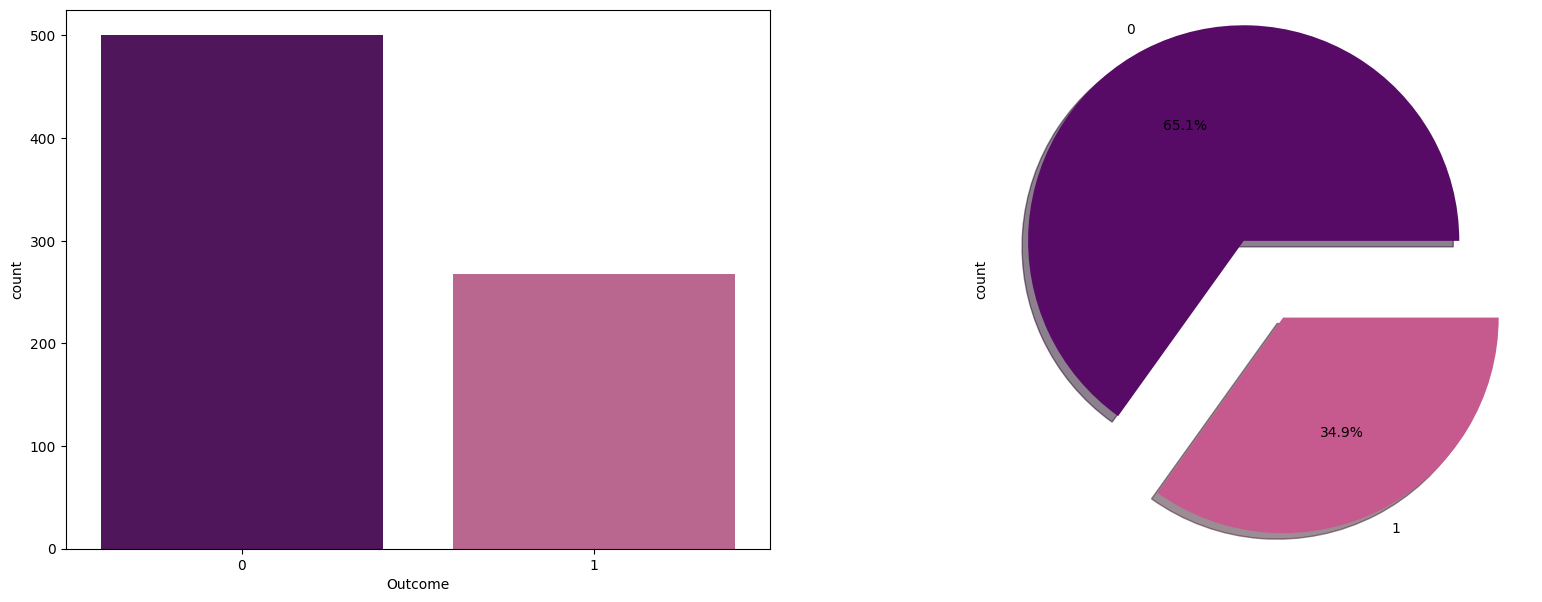

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0], palette=["#580B66", "#C65A8E"])
df["Outcome"].value_counts().plot.pie(explode=[0.2, 0.2], autopct="%1.1f%%", labels=["0", "1"], shadow=True, colors=["#580B66", "#C65A8E"], ax=ax[1])

plt.show()

Pie chart visualization shows a class comparison of diabetic diagnostics. Based on the visualization it shows that class 0 is more dominant by 65.1% which means, the patients do not suffer from diabetes. While visualization class 1 is 34.9%, which means that the patients have diabetes where the blood sugar level of the patient's body is very high. The number of non-diabetic patients is greater than the number of patients with diabetes, the ratio is very different, namely 6: 4. Their is a great imbalance between both the outcomes. ***It might appear that majority of the people are healthy/non-diabetic, but since diabetes is a chronic illness which develops over a long period of time, their is a possibility that these healthy patients already have signals/signs of having diabetes (this is what we call being pre-diabetic) & might be diabetic in the near future.*** Final conclusion will be formed only after further analysis and assessments of other features.

##### Pregnancy Analysis

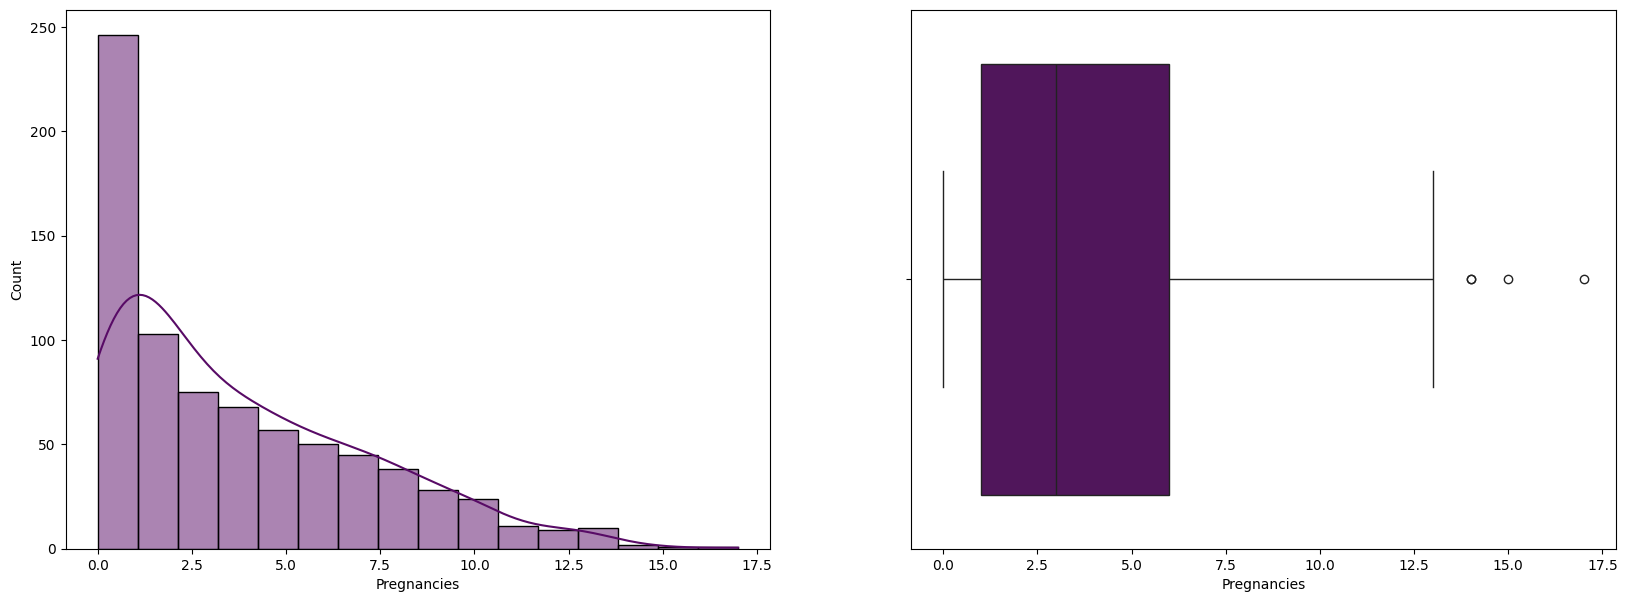

In [127]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0], color="#580B66")
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1], color="#580B66")

plt.show()

In [128]:
print("Median Pregnancies: ", df["Pregnancies"].median())
print("Maximum Pregnancies: ", df["Pregnancies"].max())

Median Pregnancies:  3.0
Maximum Pregnancies:  17


From data and the charts we can say that majority of pregnancies lie between 0 to 2.


##### Glucose Analysis

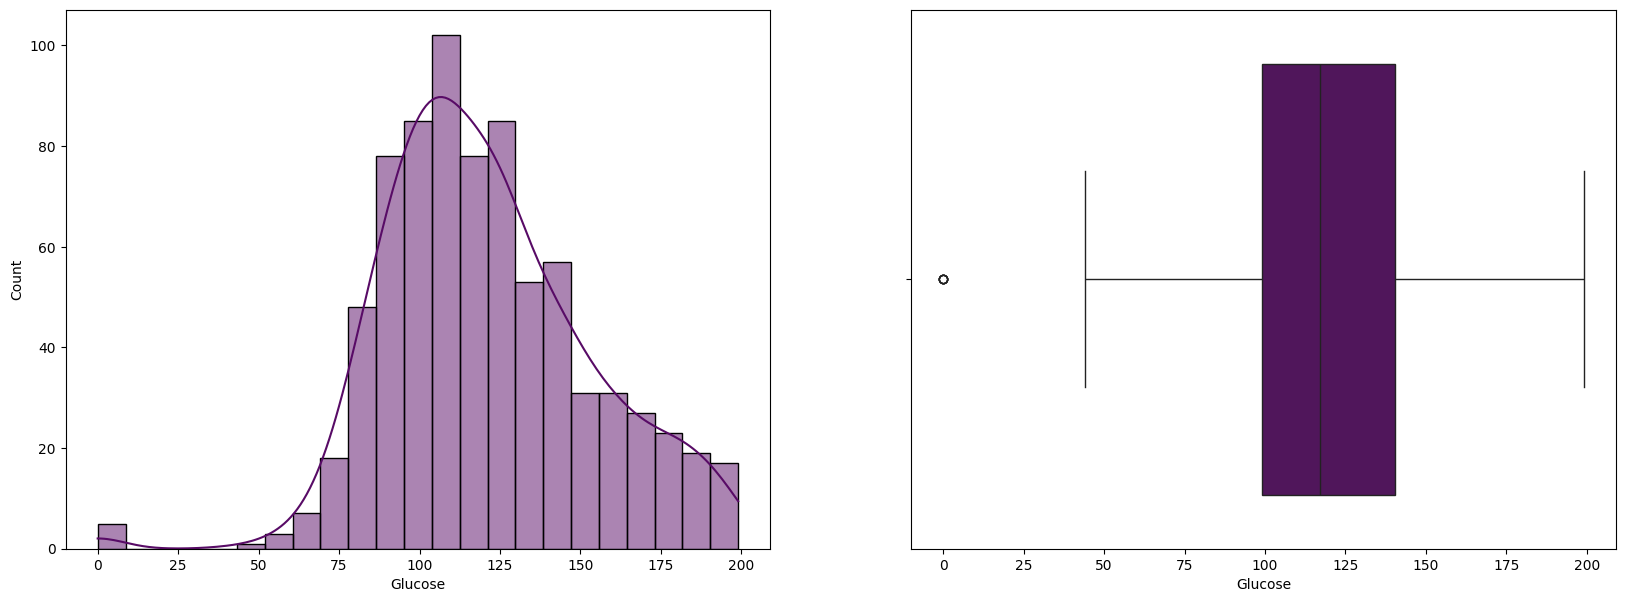

In [129]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax2[0], color="#580B66")
sns.boxplot(data=df, x="Glucose", ax=ax2[1], color="#580B66")


plt.show()

In [130]:
print("Median Glucose: ", df["Glucose"].median())
print("Maximum Glucose: ", df["Glucose"].max())
print("Mean Glucose: ", df["Glucose"].mean())

Median Glucose:  117.0
Maximum Glucose:  199
Mean Glucose:  120.89453125


In [131]:
print(f"Number of rows where Glucose is 0: {df[df['Glucose'] == 0].count()[1]}")

Number of rows where Glucose is 0: 5


Since the median(117) and mean(120) are is somewhat close to each other it is safe to assume that the data distribution is fairly symmetric.
Like we discovered earlier their are 5 rows where the reading of `Glucose` is 0, which is not possible.

##### Blood Pressure Analysis

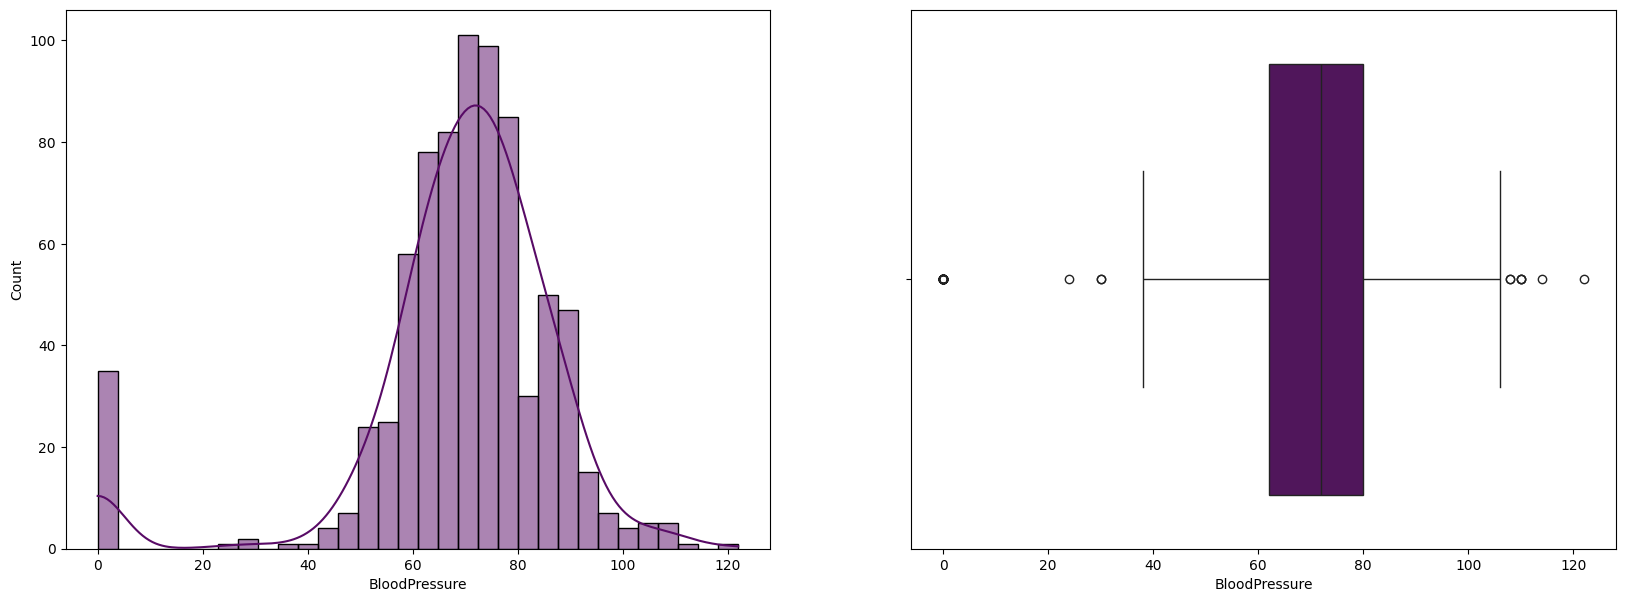

In [132]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax3[0], color="#580B66")
sns.boxplot(data=df, x="BloodPressure", ax=ax3[1], color="#580B66")


plt.show()

In [133]:
print("Median BP: ", df["BloodPressure"].median())
print("Maximum BP: ", df["BloodPressure"].max())
print("Mean BP: ", df["BloodPressure"].mean())

Median BP:  72.0
Maximum BP:  122
Mean BP:  69.10546875


In [134]:
print(f"Number of rows where Blood Pressure is 0: {df[df['BloodPressure'] == 0].count()[2]}")

Number of rows where Blood Pressure is 0: 35


Since the median(72) and mean(69) are is somewhat close to each other it is safe to assume that the data distribution is fairly symmetric.
Like we discovered earlier their are 35 rows where the reading of `Blood Pressure` is 0, which is not possible.

##### Insulin Analysis

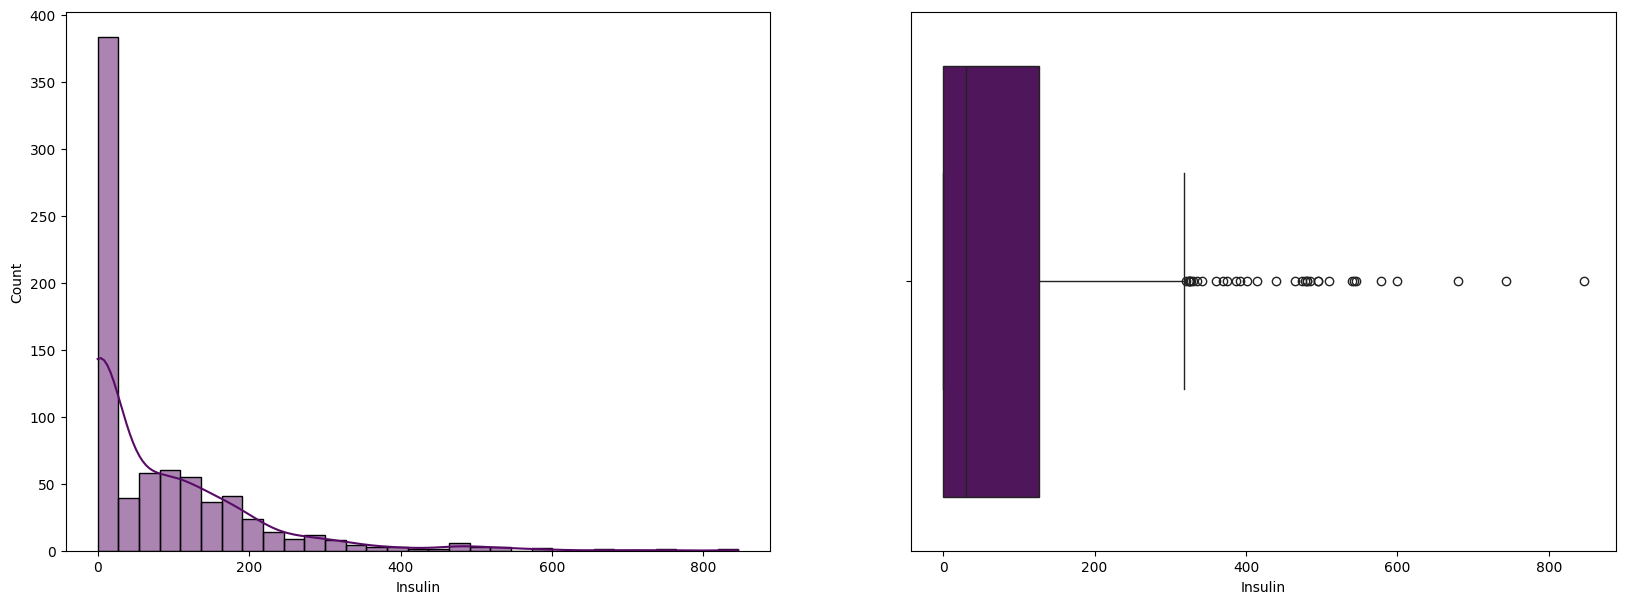

In [135]:
fig4, ax4 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax4[0], color="#580B66")
sns.boxplot(data=df, x="Insulin", ax=ax4[1], color="#580B66")


plt.show()

In [136]:
print("Median Insulin: ", df["Insulin"].median())
print("Maximum Insulin: ", df["Insulin"].max())
print("Mean Insulin: ", df["Insulin"].mean())

Median Insulin:  30.5
Maximum Insulin:  846
Mean Insulin:  79.79947916666667


In [137]:
print(f"Number of rows where Insulin is 0: {df[df['Insulin'] == 0].count()[4]}")

Number of rows where Insulin is 0: 374


The data for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution.

##### Skin Thickness Analysis

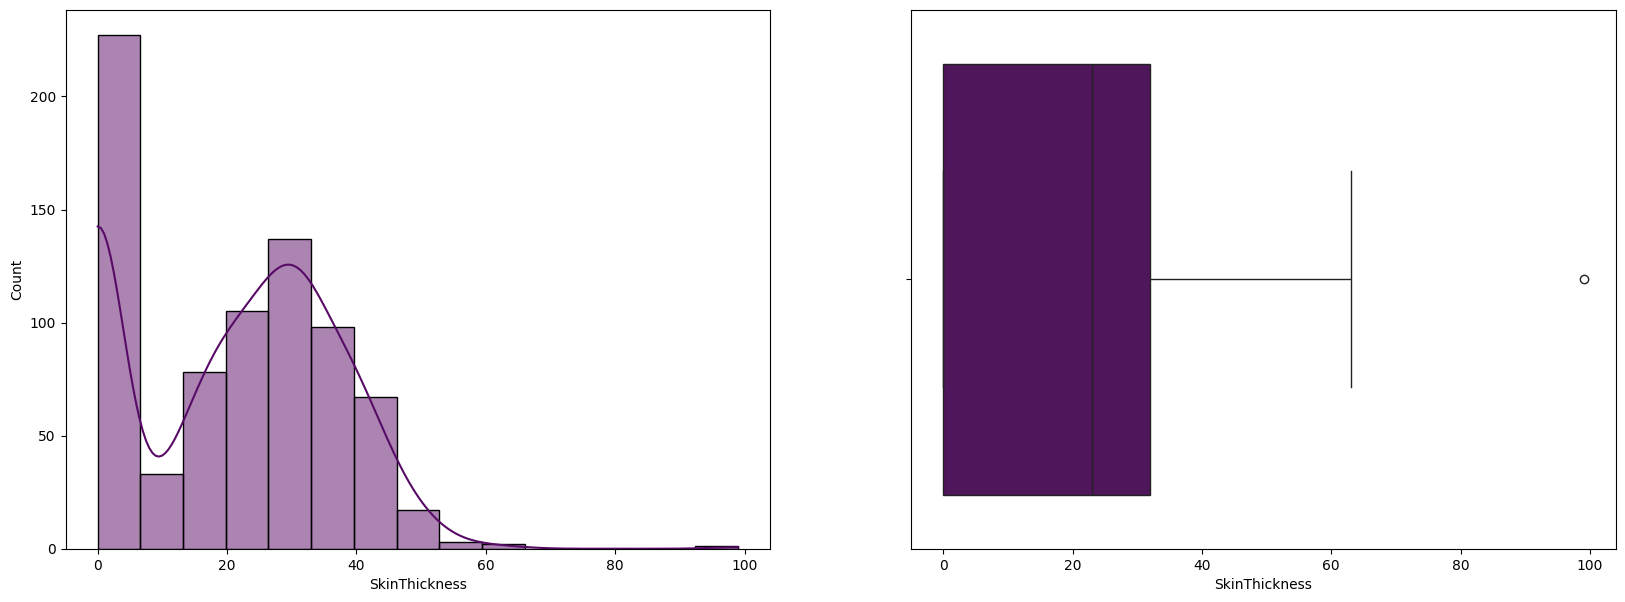

In [138]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="SkinThickness", kde=True, ax=ax5[0], color="#580B66")
sns.boxplot(data=df, x="SkinThickness", ax=ax5[1], color="#580B66")

plt.show()

In [139]:
print("Median Skin Thickness: ", df["SkinThickness"].median())
print("Maximum Skin Thickness: ", df["SkinThickness"].max())
print("Mean Skin Thickness: ", df["SkinThickness"].mean())

Median Skin Thickness:  23.0
Maximum Skin Thickness:  99
Mean Skin Thickness:  20.536458333333332


In [140]:
print(f"Number of rows where Skin Thickness is 0: {df[df['SkinThickness'] == 0].count()[3]}")

Number of rows where Skin Thickness is 0: 227


##### BMI Analysis

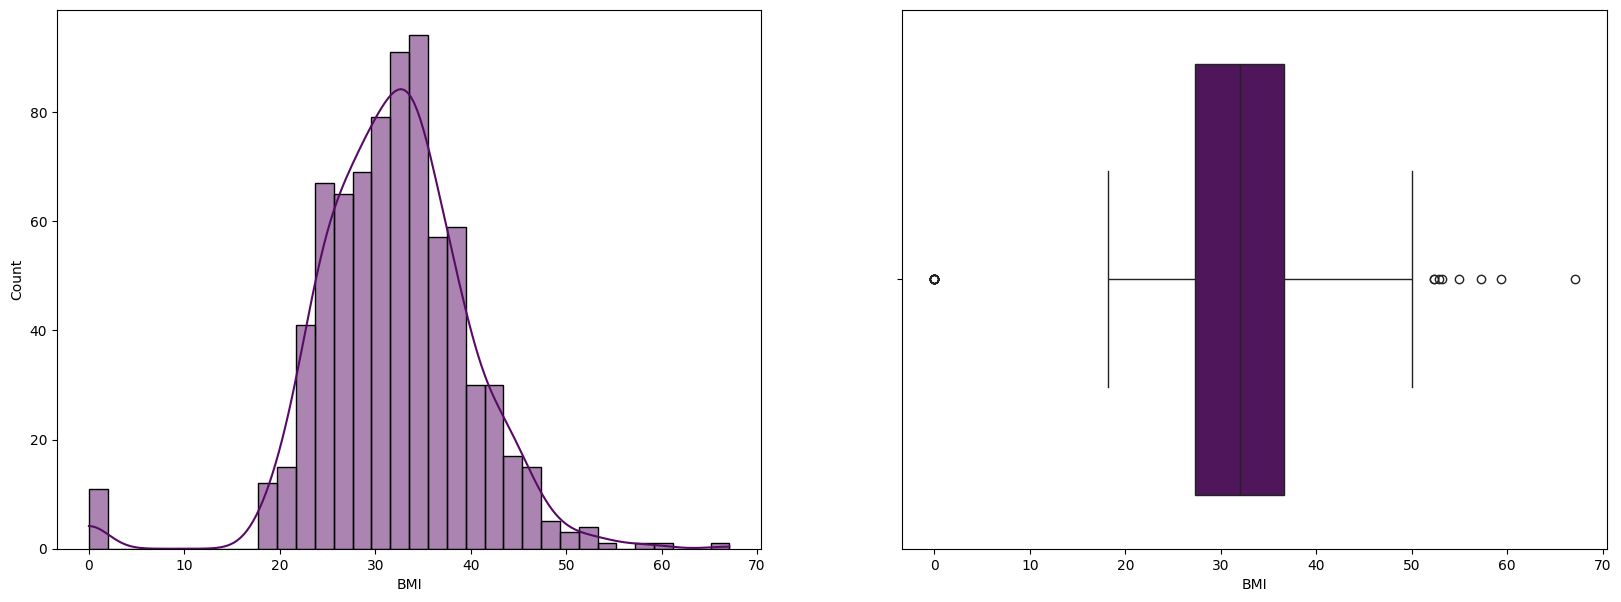

In [141]:
fig6, ax6 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax6[0], color="#580B66")
sns.boxplot(data=df, x="BMI", ax=ax6[1], color="#580B66")

plt.show()

In [142]:
print("Median BMI: ", df["BMI"].median())
print("Maximum BMI: ", df["BMI"].max())
print("Mean BMI: ", df["BMI"].mean())

Median BMI:  32.0
Maximum BMI:  67.1
Mean BMI:  31.992578124999998


In [143]:
print(f"Number of rows where BMI is 0: {df[df['BMI'] == 0].count()[5]}")

Number of rows where BMI is 0: 11


Based on mean and median it seem that data is fairly distributed.
The number of rows with 0 BMI are 11.

##### Diabetes Pedigree Function Analysis 

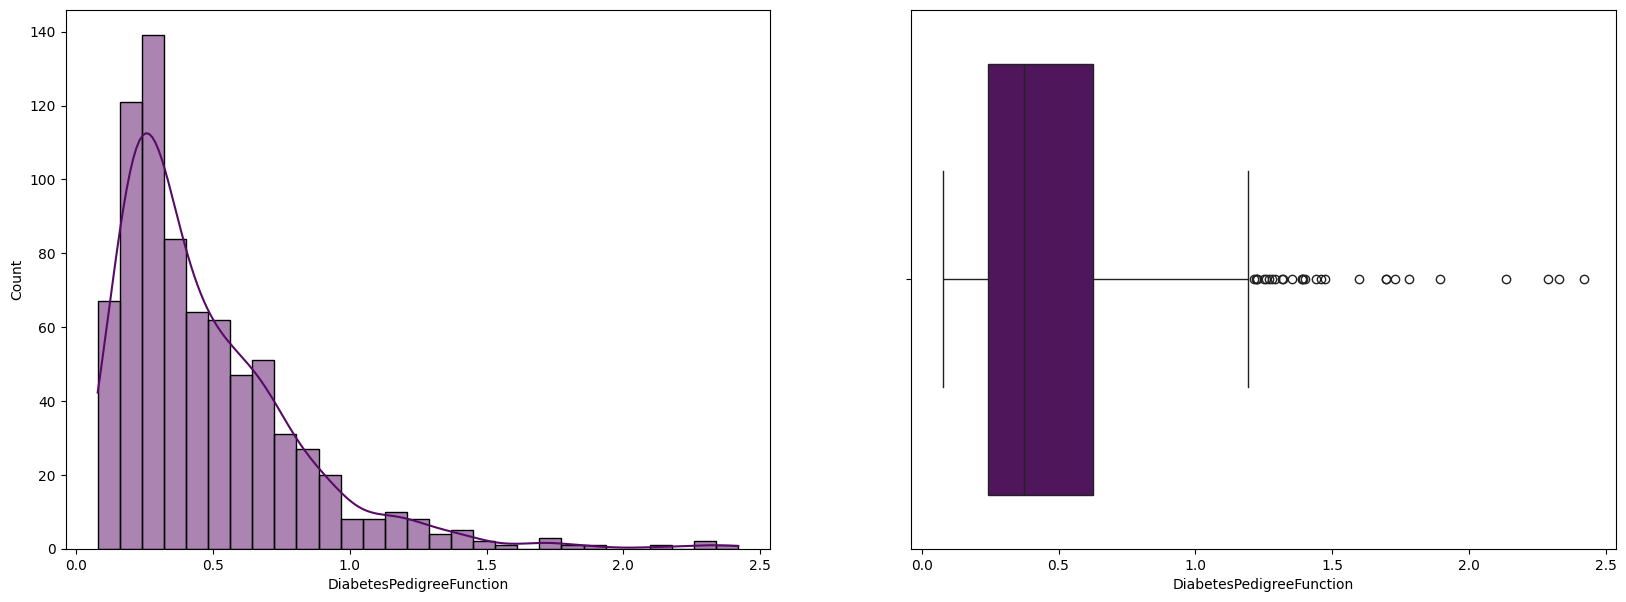

In [144]:
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax7[0], color="#580B66")
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax7[1], color="#580B66")

plt.show()

In [145]:
print("Median Diabetes Pedigree Function: ", df["DiabetesPedigreeFunction"].median())
print("Maximum Diabetes Pedigree Function: ", df["DiabetesPedigreeFunction"].max())
print("Mean Diabetes Pedigree Function: ", df["DiabetesPedigreeFunction"].mean())

Median Diabetes Pedigree Function:  0.3725
Maximum Diabetes Pedigree Function:  2.42
Mean Diabetes Pedigree Function:  0.47187630208333325


Based on the graph we can see that the `Diabetes Pedigree Function` is highly skewed and the boxplot shows that their are many outliers.

##### Age Analysis

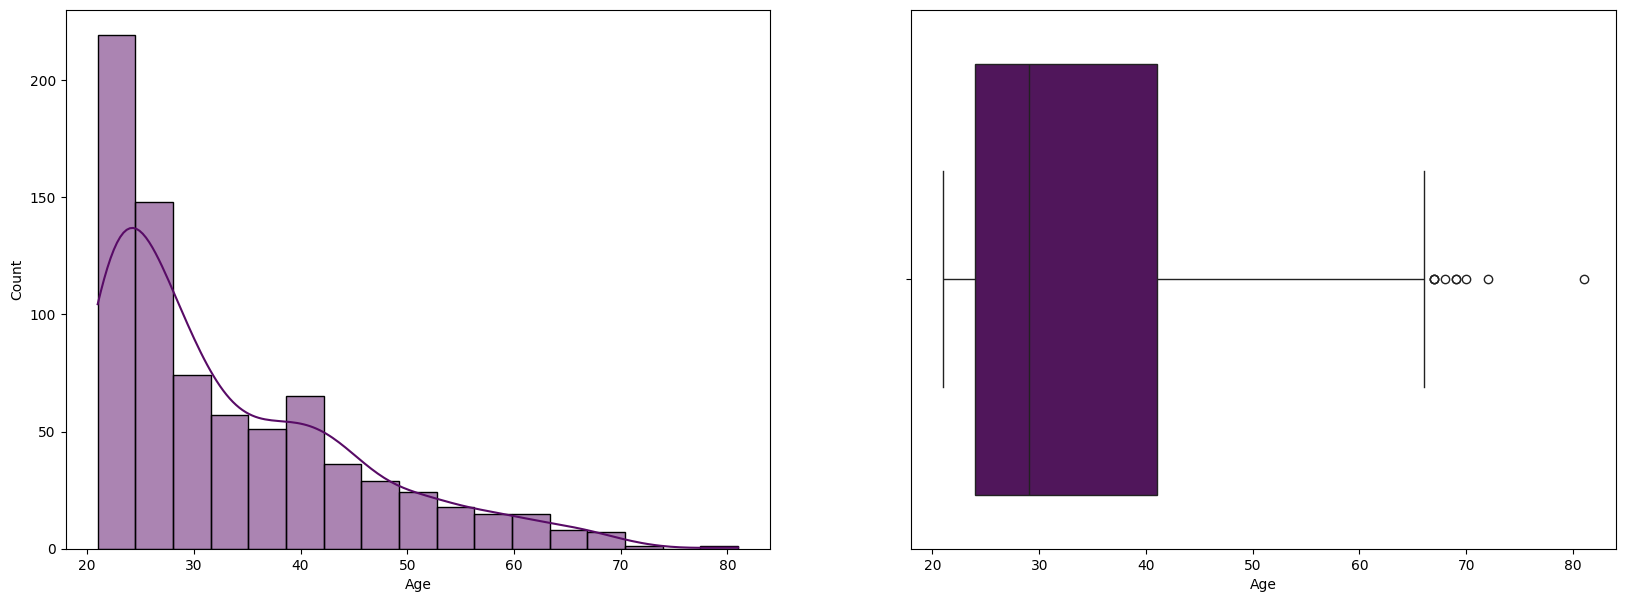

In [146]:
fig8, ax8 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Age", kde=True, ax=ax8[0], color="#580B66")
sns.boxplot(data=df, x="Age", ax=ax8[1], color="#580B66")

plt.show()

In [147]:
print("Median Age: ", df["Age"].median())
print("Maximum Age: ", df["Age"].max())
print("Mean Age: ", df["Age"].mean())

Median Age:  29.0
Maximum Age:  81
Mean Age:  33.240885416666664


### Feature Distributions and Data Characteristics

The univariate analysis shows that many health-related variables exhibit **skewed distributions, outliers, and non-normal behavior**. Features such as glucose, insulin, skin thickness, and BMI display long right tails, indicating the presence of individuals with substantially elevated metabolic indicators. Boxplots further confirm the existence of extreme values across multiple variables.

Additionally, certain variables show **irregular value patterns**, including spikes near zero, which reflects missing or unrecorded clinical measurements. These characteristics highlight the need for careful preprocessing, including handling outliers, scaling, and addressing potential data artifacts to ensure reliable modeling.

Overall, the dataset contains clinically meaningful variation but requires structured data cleaning to manage skewness and inconsistencies.


# Skewness Analysis

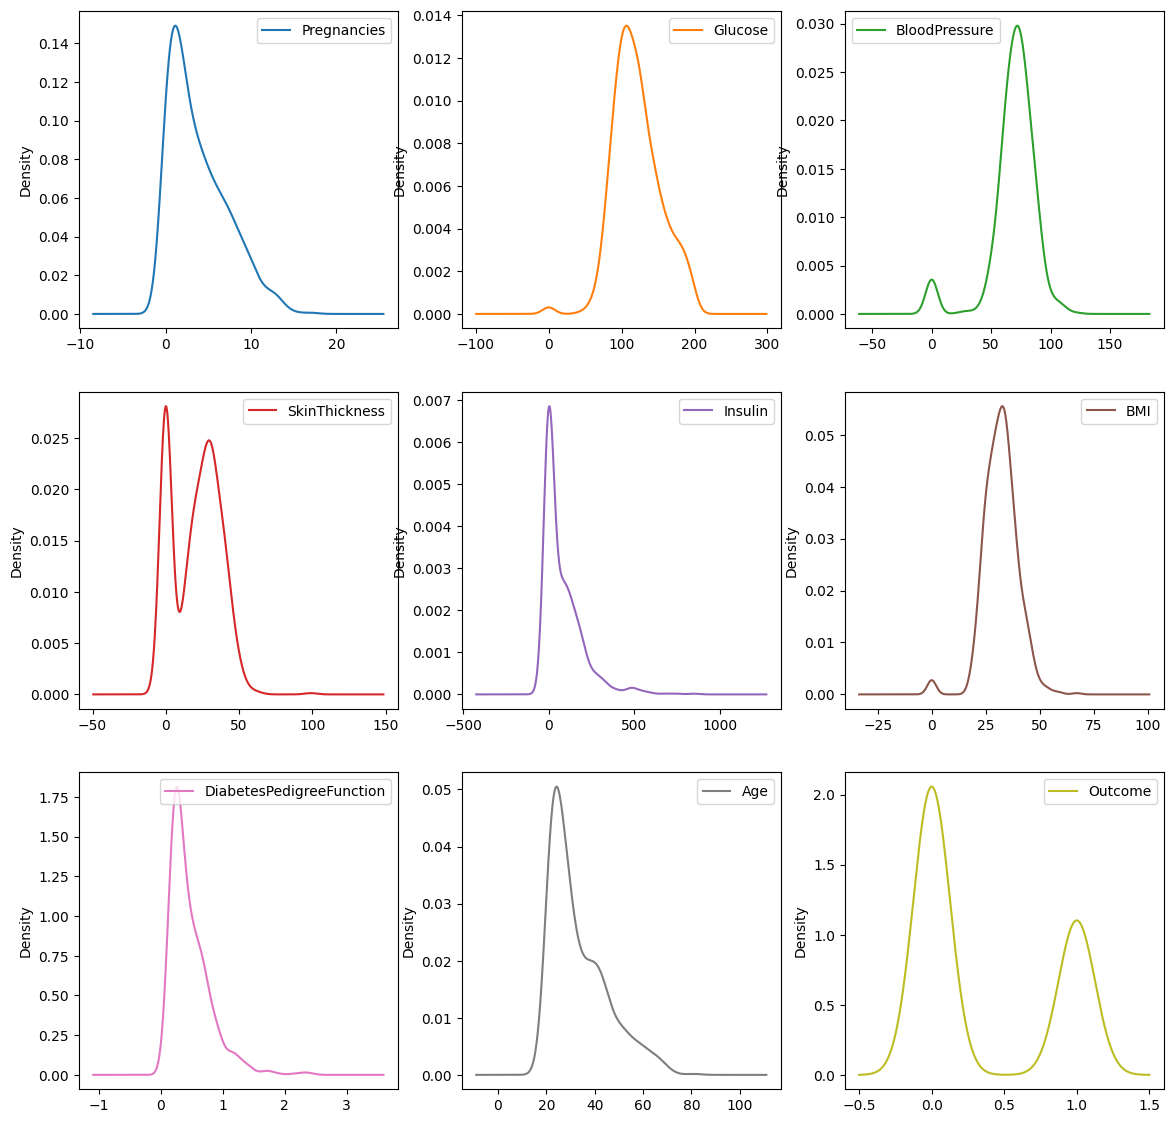

In [148]:
df.plot(kind= 'density', subplots=True, layout=(3,3), sharex=False, figsize=(14,14))
plt.show()


Based on the results of the visualization of the distribution of data for each column, we can see that:

- The features of Pregnancies, SkinThickness, Insulin, DiabetesPedigree Function and age, are skewed to the left, which indicates that the scatter values of these features converge on the left tail of the overall distribution of the dataset.

- Glucose feature, forming a density distribution that is skewed to the right, which indicates that the scatter values of this features converge on the right tail of the overall distribution of the dataset.

- The BloodPressure and BMI features, form a normal skewed distribution, where the mean and mean values converge at one midpoint of the entire data set, forming a perfect bell image.

In [149]:
%pip install scipy
from scipy.stats import skew


skew_col = lambda col: format(skew(df[col]))
for col in df.drop(columns=['Outcome']).columns:
    print(f"Skewness for the column {col} is {skew_col(col)}")


Note: you may need to restart the kernel to use updated packages.
Skewness for the column Pregnancies is 0.8999119408414357
Skewness for the column Glucose is 0.17341395519987735
Skewness for the column BloodPressure is -1.8400052311728738
Skewness for the column SkinThickness is 0.109158762323673
Skewness for the column Insulin is 2.2678104585131753
Skewness for the column BMI is -0.42814327880861786
Skewness for the column DiabetesPedigreeFunction is 1.9161592037386292
Skewness for the column Age is 1.127389259531697


Columns like `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness` and `BMI` are not that much skewed. But columns like `Insulin` and `DiabetesPedigreeFunction` highly skewed.

# Multivariate Analysis

##### Analysis of Glucose and Outcome

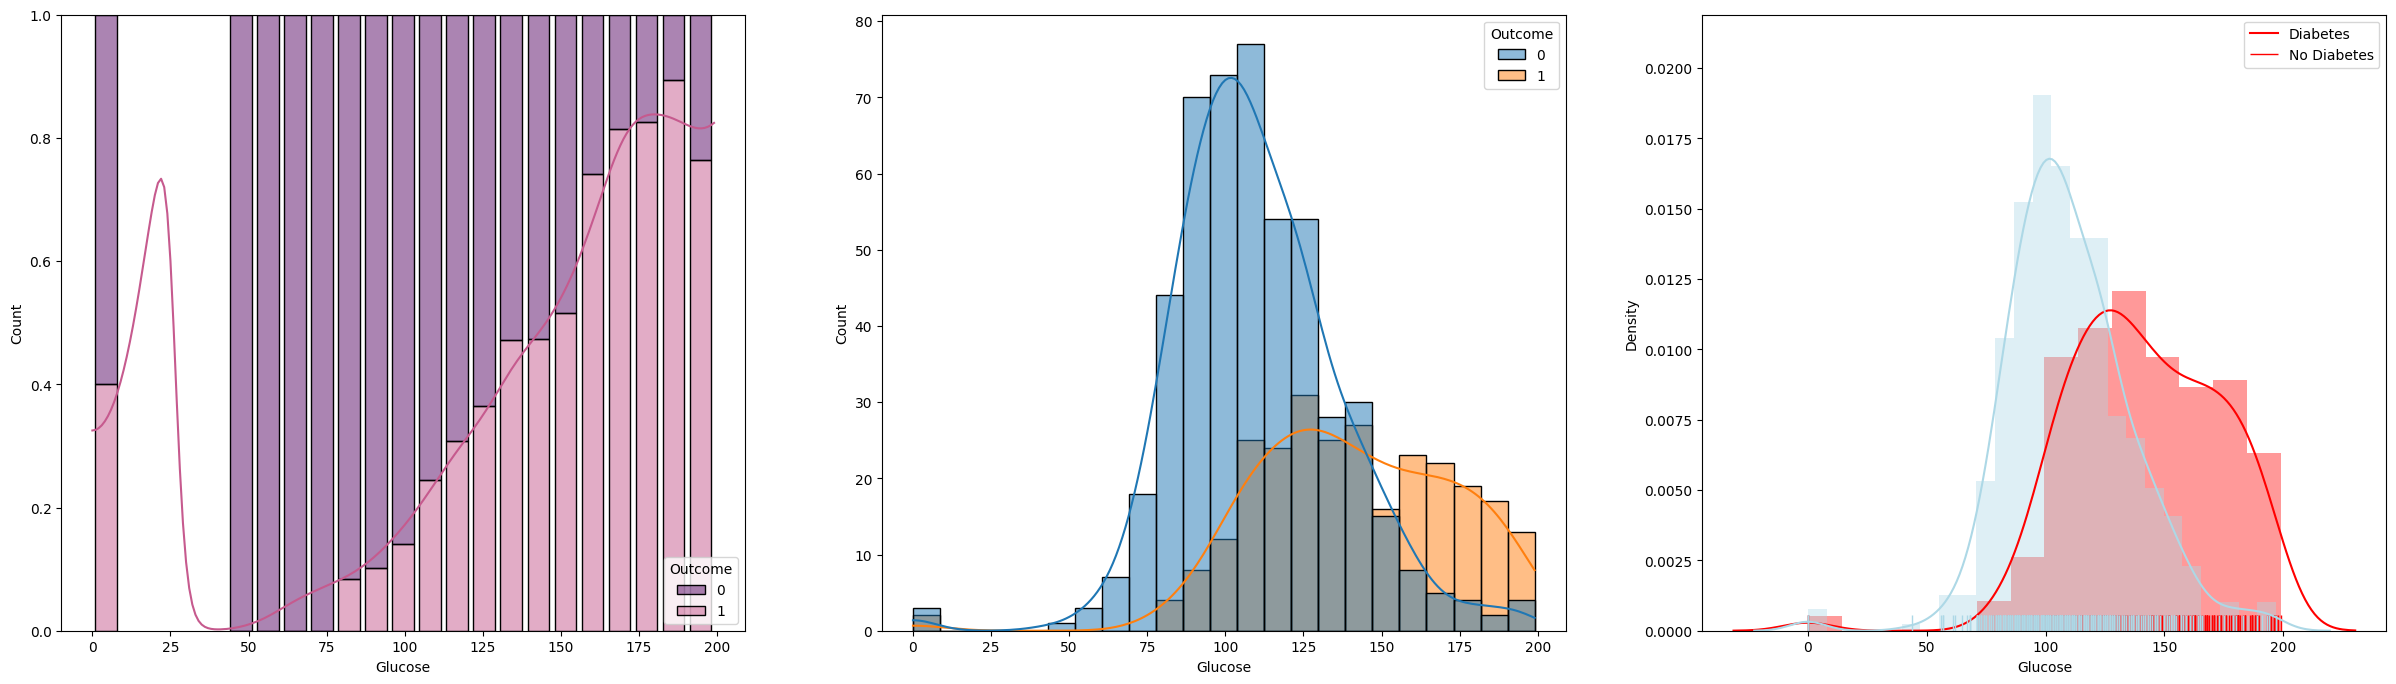

In [150]:
fig9, ax9 = plt.subplots(1, 3, figsize=(30, 8))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax9[0], palette=["#580B66", "#C65A8E"])
sns.histplot(data=df, x='Glucose', kde=True, hue="Outcome", ax=ax9[1])

sns.distplot(df["Glucose"][df.Outcome == 1], color="red", rug=True, ax=ax9[2])
sns.distplot(df["Glucose"][df.Outcome == 0], color="lightblue", rug=True, ax=ax9[2])
ax9[2].legend(['Diabetes', 'No Diabetes'])

plt.show()

From the above plots, we observe a positive relationship between **Glucose** levels and the likelihood of diabetes.

- As the value of `Glucose` increases, the number of patients having diabetes (i.e., `Outcome = 1`) also increases.  
- After a `Glucose` value of around **125**, there is a clear and steady rise in the count of patients with `Outcome = 1`, showing that most diagnoses occur only at higher glucose levels.  
- At lower and mid-range glucose values, the presence of some diabetic cases indicates that risk may already exist before glucose reaches very high levels, but these cases are fewer and less distinct.  
- Note that when the `Glucose` value is **0**, it represents missing or invalid measurements. 

So, while `Glucose` is strongly associated with diabetes, the pattern suggests that **most cases are identified only after glucose becomes considerably high**, implying that opportunities for **earlier detection at lower glucose levels may be limited or overlooked**.


##### Analysis of BloodPressure and Outcome

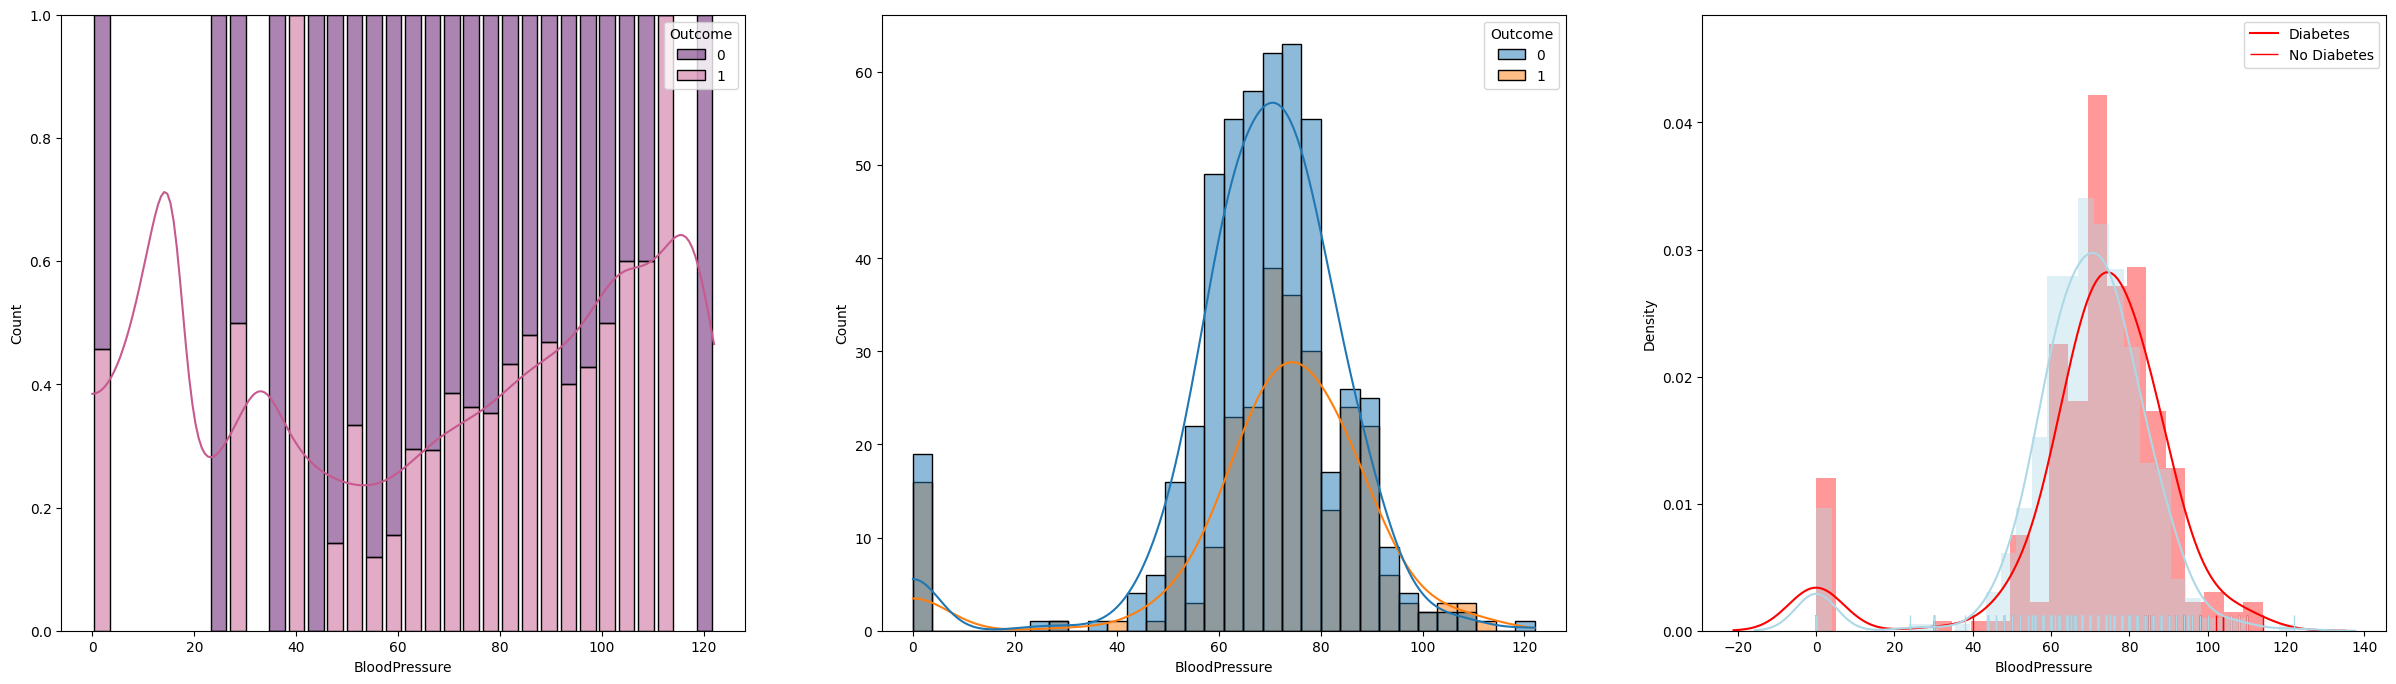

In [151]:

fig10, ax10 = plt.subplots(1, 3, figsize=(30, 8))

sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax10[0], palette=["#580B66", "#C65A8E"])
sns.histplot(data=df, x='BloodPressure', kde=True, hue="Outcome", ax=ax10[1])

sns.distplot(df["BloodPressure"][df.Outcome == 1], color="red", rug=True, ax=ax10[2])
sns.distplot(df["BloodPressure"][df.Outcome == 0], color="lightblue", rug=True, ax=ax10[2])
ax10[2].legend(['Diabetes', 'No Diabetes'])

plt.show()

From the above plots, we observe the relationship between **BloodPressure** and diabetes outcome.

- The distributions of `BloodPressure` for diabetic (`Outcome = 1`) and non-diabetic (`Outcome = 0`) patients show a large overlap, especially in the normal and mid-range values (around 60–80).  
- Most patients with `Outcome = 1` appear concentrated in moderate to slightly higher blood pressure ranges, people with diabetes have elevated blood pressure.  
- The presence of diabetic cases even at lower and mid blood pressure levels suggests that risk may exist before clear separation between the two groups becomes visible, but these early signals are not strongly distinguished in the data.  
- Note that `BloodPressure = 0` represents missing or invalid values. 


##### Analysis of BMI and Outcome

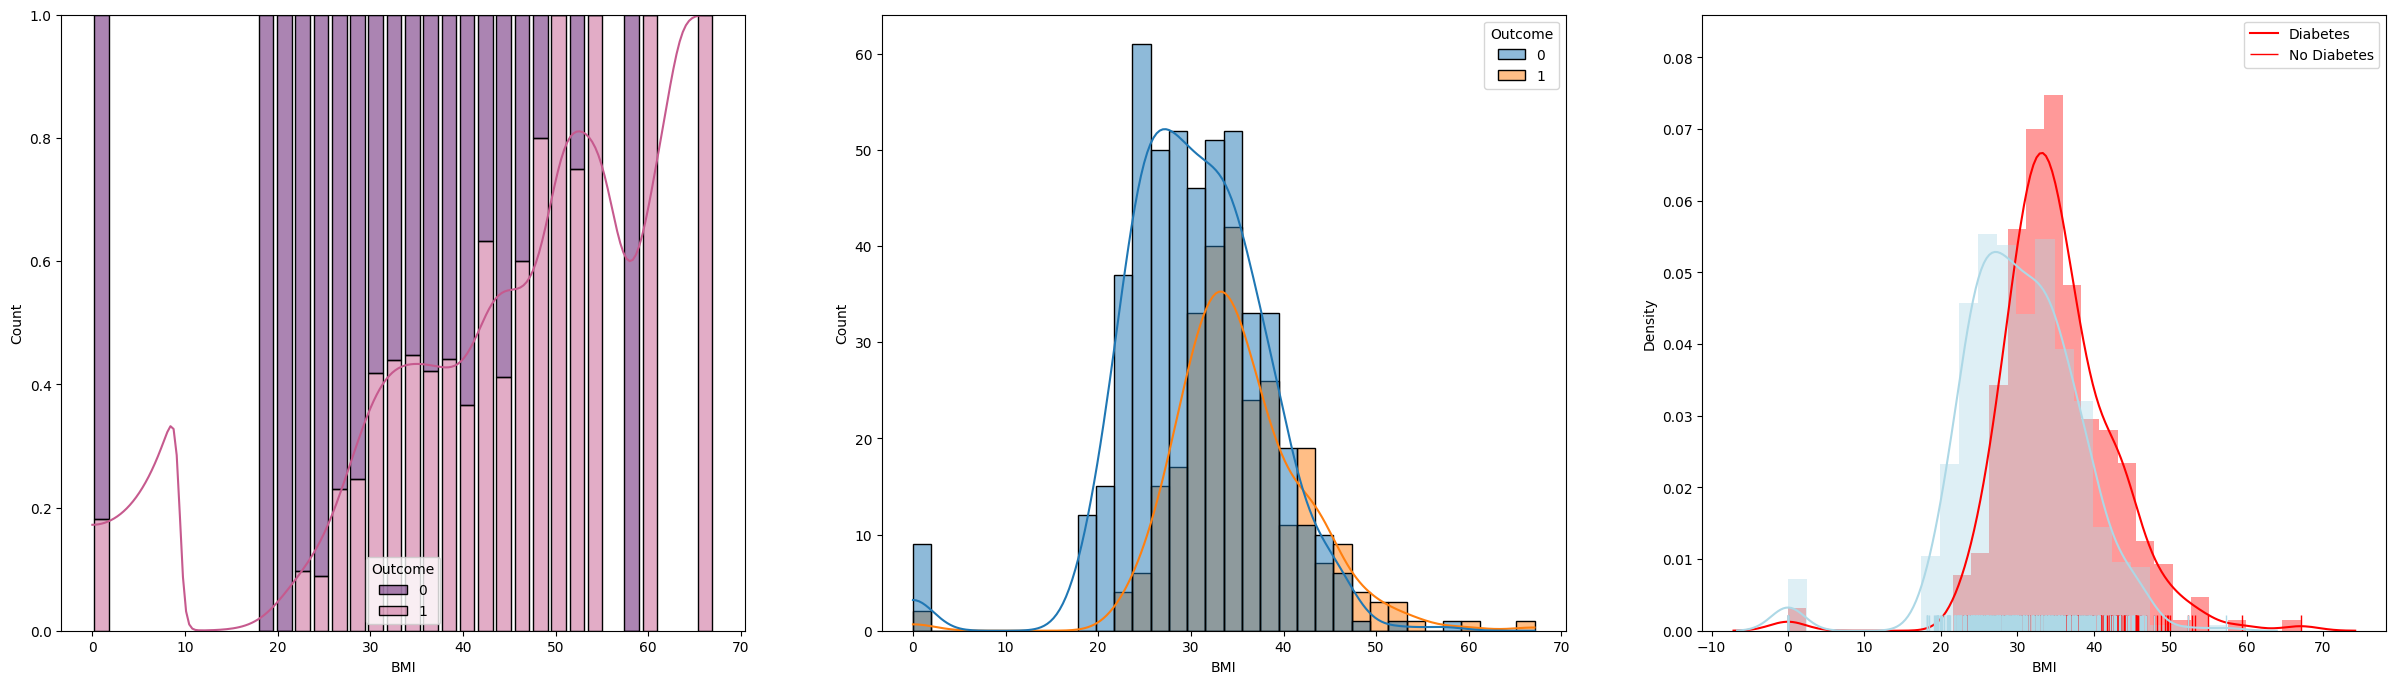

In [152]:

fig11, ax11 = plt.subplots(1, 3, figsize=(30, 8))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax11[0], palette=["#580B66", "#C65A8E"])
sns.histplot(data=df, x='BMI', kde=True, hue="Outcome", ax=ax11[1])

sns.distplot(df["BMI"][df.Outcome == 1], color="red", rug=True, ax=ax11[2])
sns.distplot(df["BMI"][df.Outcome == 0], color="lightblue", rug=True, ax=ax11[2])
ax11[2].legend(['Diabetes', 'No Diabetes'])

plt.show()

From the above plots, we observe the relationship between **BMI** and diabetes outcome.

- As the value of `BMI` increases, the number of patients with diabetes (i.e., `Outcome = 1`) also increases, indicating that higher body mass is associated with greater diabetes risk.  
- Most diabetic cases are concentrated in the **overweight to obese range** (approximately BMI 30–45), suggesting that diagnosis commonly occurs after BMI has already reached elevated levels.  
- At lower and mid-range BMI values, there is considerable overlap between diabetic and non-diabetic individuals.  
- The presence of diabetic cases even at moderate BMI levels indicates that risk may exist earlier.  
- Note that `BMI = 0` represents missing or invalid values.

So, while **BMI** shows a positive association with diabetes, the distributions suggest that **most cases are identified only after BMI becomes relatively high**.


##### Analysis of Age and Outcome

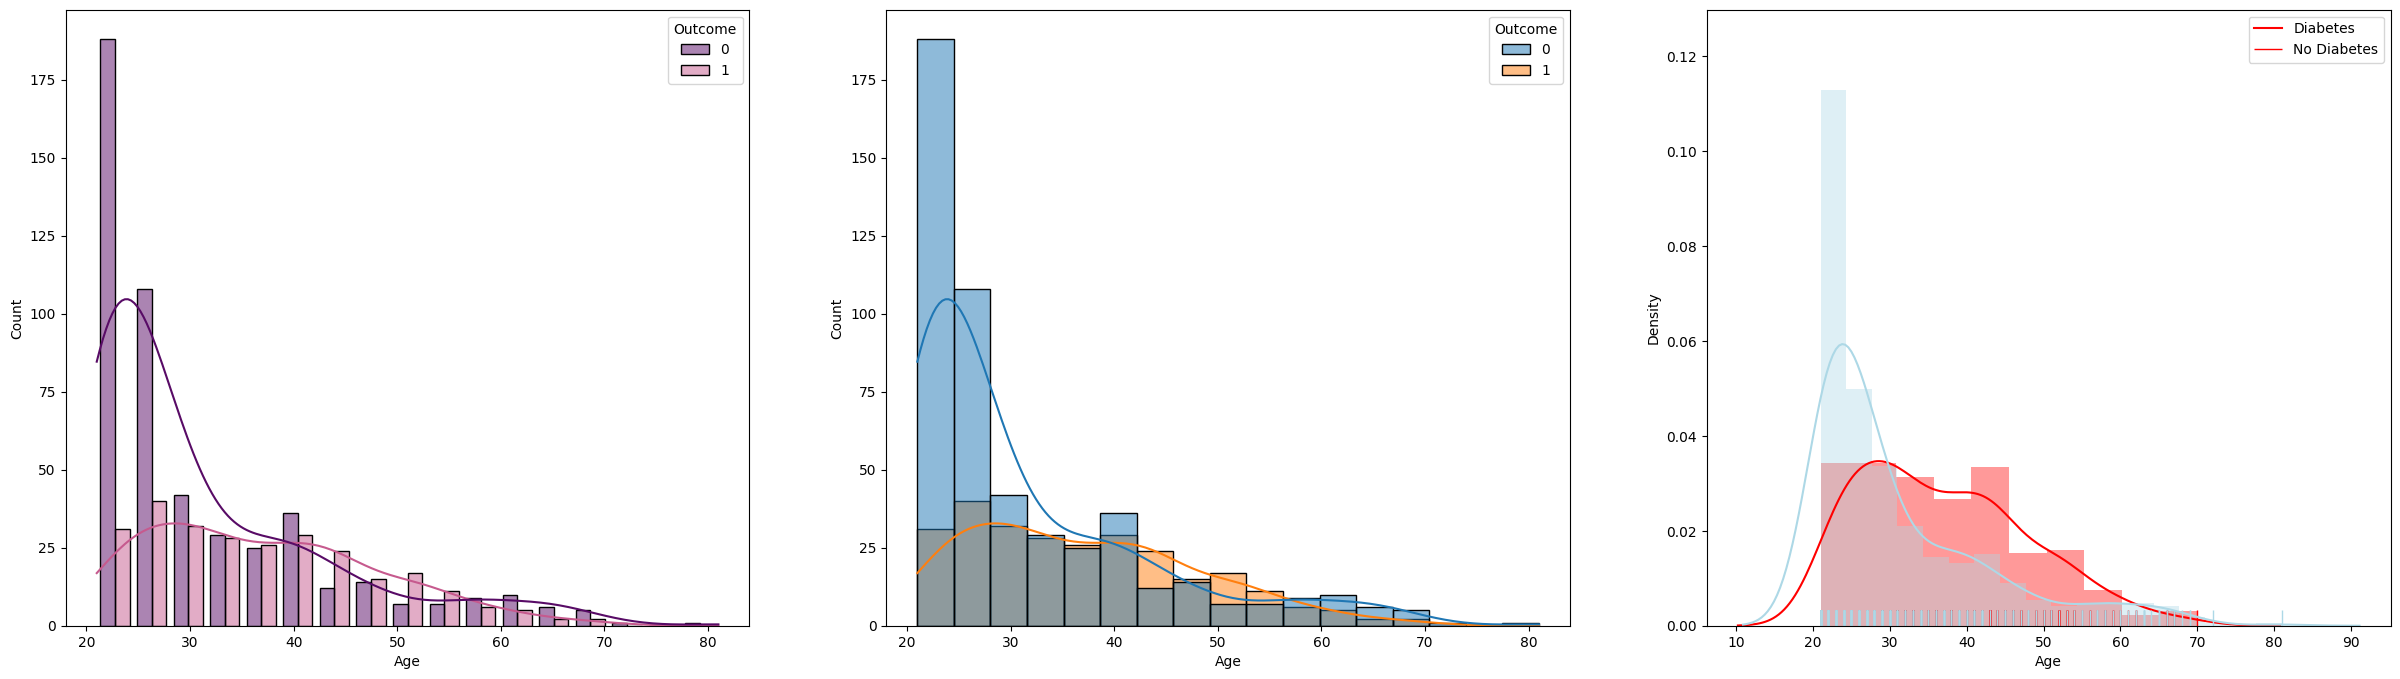

In [153]:

fig12, ax12 = plt.subplots(1, 3, figsize=(30, 8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax12[0], palette=["#580B66", "#C65A8E"])
sns.histplot(data=df, x='Age', kde=True, hue="Outcome", ax=ax12[1])

sns.distplot(df["Age"][df.Outcome == 1], color="red", rug=True, ax=ax12[2])
sns.distplot(df["Age"][df.Outcome == 0], color="lightblue", rug=True, ax=ax12[2])
ax12[2].legend(['Diabetes', 'No Diabetes'])

plt.show()

From the above plots, we observe the relationship between **Age** and diabetes outcome.

- As the value of `Age` increases, the number of patients with diabetes (i.e., `Outcome = 1`) also tends to increase, indicating that diabetes is more prevalent among older individuals.  
- Most diabetic cases are concentrated in the **middle-aged to older groups** (approximately 35 years and above), suggesting that diagnosis commonly occurs later in life rather than at younger ages.  
- At younger ages, the number of diabetic cases is relatively low, even though some overlap with non-diabetic individuals exists. This implies that early-age risk is present but not strongly represented in the data.  
- The heavy overlap between diabetic and non-diabetic distributions in the 30–45 age range shows that age alone does not clearly distinguish risk.

**Age** shows a positive association with diabetes.


##### Analysis of Pregnancies and Outcome

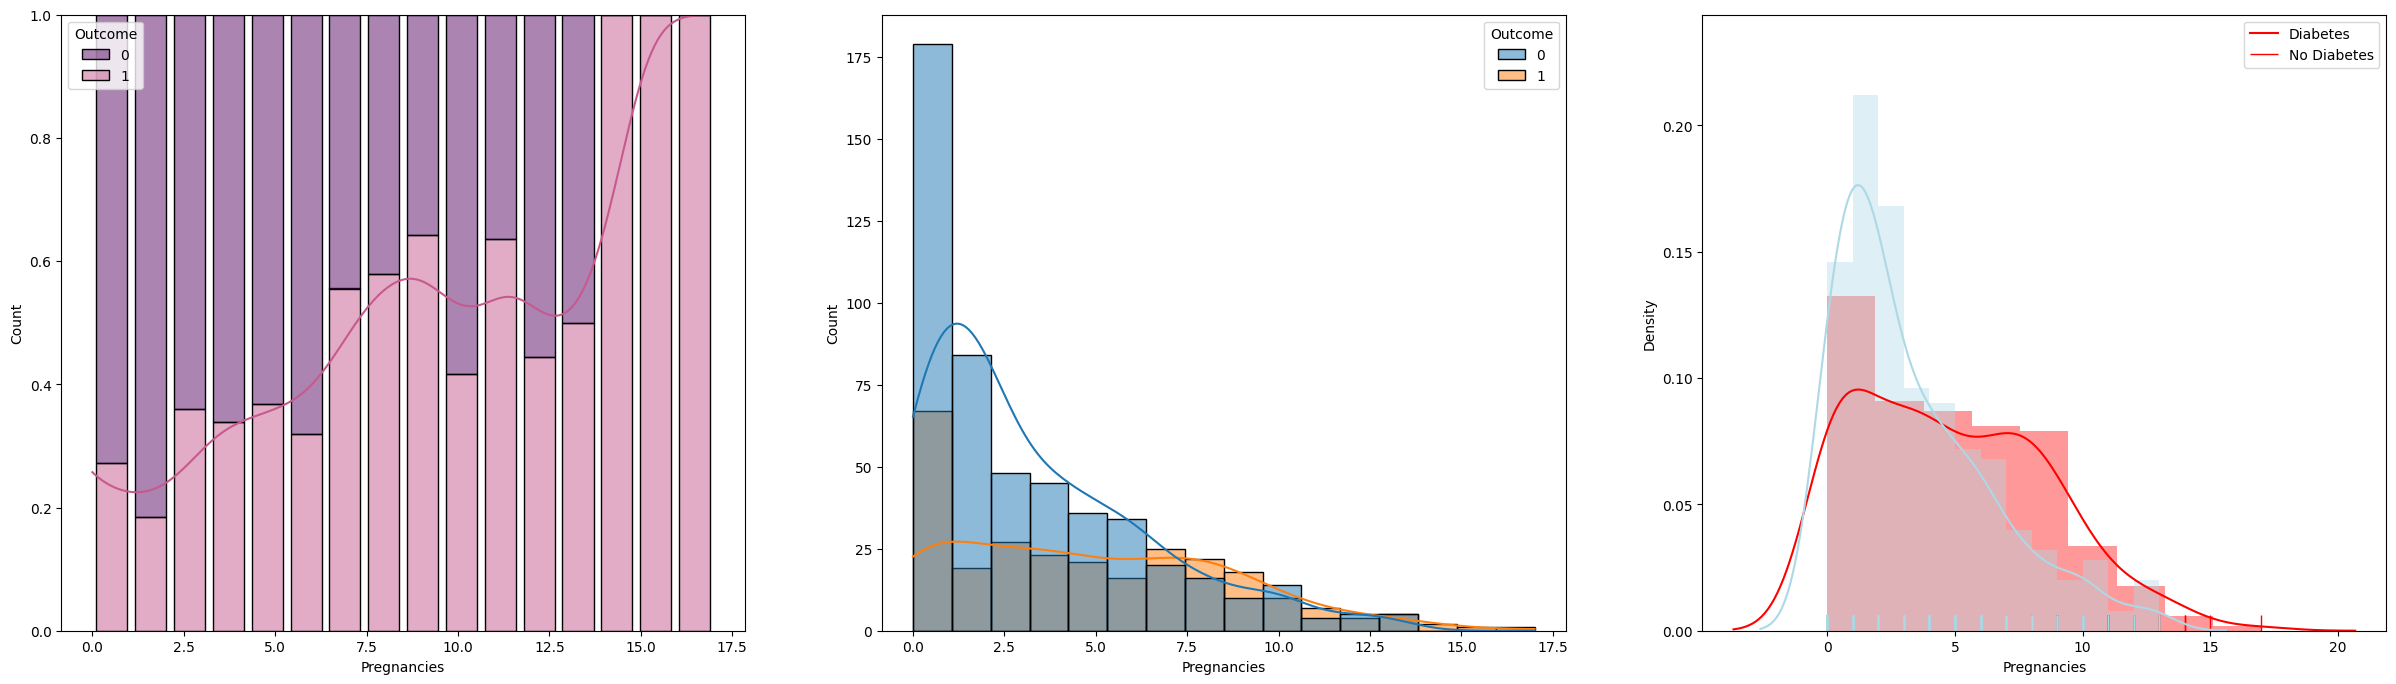

In [154]:

fig13, ax13 = plt.subplots(1, 3, figsize=(30, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax13[0], palette=["#580B66", "#C65A8E"])
sns.histplot(data=df, x='Pregnancies', kde=True, hue="Outcome", ax=ax13[1])

sns.distplot(df["Pregnancies"][df.Outcome == 1], color="red", rug=True, ax=ax13[2])
sns.distplot(df["Pregnancies"][df.Outcome == 0], color="lightblue", rug=True, ax=ax13[2])
ax13[2].legend(['Diabetes', 'No Diabetes'])

plt.show()

From the above plots, we observe the relationship between **Pregnancies** and diabetes outcome.

- As the value of `Pregnancies` increases, the number of patients with diabetes (i.e., `Outcome = 1`) also tends to increase, indicating a positive association between the number of pregnancies and diabetes risk.  
- Most diabetic cases are concentrated at **higher pregnancy counts** (around 5 and above).  
- At lower values of `Pregnancies`, there is significant overlap between diabetic and non-diabetic individuals.  
- The gradual shift of the diabetic distribution toward higher values shows that the effect becomes more apparent only as the number of pregnancies increases.



### Relationship Between Features and Diabetes Outcome

Comparative distributions across outcome classes reveal systematic shifts in several key indicators. Variables such as **glucose and BMI** show clear separation, with diabetic individuals consistently occupying higher value ranges. Moderate trends are also observed in **age, insulin levels, and number of pregnancies**, where higher values are more common among those with diabetes.

However, substantial overlap exists across most features, particularly for variables like blood pressure and skin thickness. This indicates that **no single variable is sufficient to distinguish diabetes status**, and that the condition is associated with **combined patterns across multiple physiological and demographic factors** rather than isolated thresholds.

These observations support the use of multivariate, data-driven methods to identify meaningful relationships between risk indicators and disease presence.


### Final Insight & Identification of the Core Problem

The exploratory patterns indicate that diabetes is not characterized by abrupt boundaries in individual health indicators, but by **gradual, overlapping shifts across multiple variables**. Many individuals without a diabetes diagnosis already exhibit elevated values in key metabolic features, while others with diabetes do not consistently present extreme measurements across all indicators.

This suggests a structural limitation in traditional assessment approaches: **risk is often recognized only after clinical thresholds are crossed**, rather than being inferred from combinations of earlier, subtler signals embedded within the data. Although measurable warning patterns exist across physiological and demographic variables, these patterns are not immediately apparent through isolated indicators.

Consequently, the central problem is not the absence of relevant information, but the lack of systematic methods to integrate multiple factors into a coherent assessment of disease risk. This creates a gap in timely identification, limiting opportunities for preventive intervention and proactive healthcare planning.

The observed data structure therefore motivates the development of a machine learning–based approach capable of modeling complex, multivariate relationships. By leveraging patterns distributed across several features, such a model can demonstrate that diabetes risk is not only identifiable, but can be inferred earlier and more consistently than through traditional single-variable evaluation.

### Hypothesis

**Diabetes status is not determined by any single health indicator but emerges from combined patterns across multiple physiological and demographic variables; therefore, a multivariate machine learning model will identify diabetes risk more effectively than threshold-based or single-feature approaches.**


# Correlation Matrix

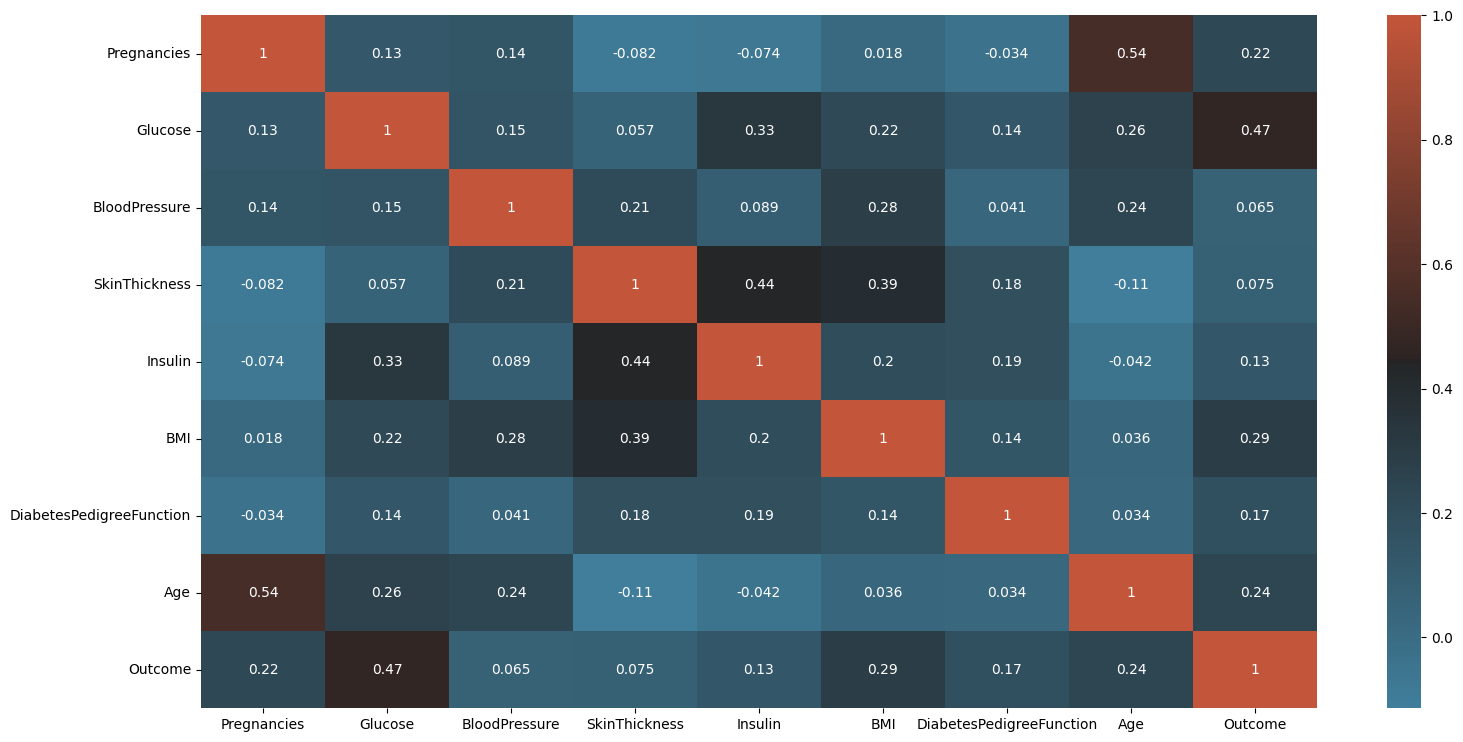

In [155]:
corr_matrix = df.corr()

fig14, ax14 = plt.subplots(figsize=(18, 9))
cmap = sns.diverging_palette(230, 20, center= "dark", as_cmap=True)
dataplot = sns.heatmap(data=corr_matrix, cmap=cmap, vmax=1.0, annot=True, ax=ax14)
plt.show()


The correlation matrix reveals that no single variable fully explains diabetes status. Glucose shows the strongest positive relationship with the outcome (0.47), followed by BMI (0.29), age (0.24), and number of pregnancies (0.22). Other clinical indicators such as insulin, blood pressure, and skin thickness exhibit relatively weak individual correlations.

Importantly, several predictors demonstrate moderate inter-feature relationships, including age with pregnancies (0.54), skin thickness with insulin (0.44), and skin thickness with BMI (0.39). These interdependencies indicate that diabetes risk is encoded in multivariate patterns rather than isolated variables.

Overall, the results confirm that while certain features are informative, diabetes cannot be reliably characterized by any single factor. Instead, risk emerges from the combined interaction of multiple physiological and demographic variables, supporting the use of machine learning approaches for integrated risk assessment.


# Data Pre-Processing 

Now we move on to preparing the dataset for machine learning. This process includes a few important steps:

* **Train–test split:** The data is separated into training and testing sets using stratified sampling to maintain the original class distribution in both sets.
* **Imputing missing or incorrect values:** Some attributes contain zero values that are unrealistic, so these are substituted with the mean or median of the corresponding feature.
* **Normalizing features:** Standardization is performed to scale the features to a similar range, ensuring that no single feature dominates the learning process.


In [156]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

Standardizing a dataset means rescaling the data so that it has a mean of 0 and a standard deviation of 1. In simple terms, this involves centering the data by subtracting the mean and scaling it by dividing by the standard deviation.

Feature scaling is crucial because different variables often exist on very different scales. For example, an **Age** feature may contain values in the tens, while **DPF** values might be small decimals. Without scaling, features with larger numerical ranges can dominate the learning process and disproportionately influence the model.

A key best practice is to compute scaling parameters using **only the training data** and then apply the same transformation to the test data. This avoids introducing bias.

For instance, if normalization is done by subtracting the mean and dividing by the variance, calculating these statistics on the entire dataset would allow information from the test set to influence the training process. This is known as **data leakage**.

Instead, the correct approach is to calculate the mean and variance from the training set alone, use them to standardize the training data, and then apply those same values to standardize the test data during evaluation.


In [157]:
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

### Fill in the missing values

We will replace the 0-values of the columns:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

with their median & mean values.

In [158]:
X_train['Insulin'] = X_train['Insulin'].replace(0, X_train['Insulin'].median())
X_test['Insulin'] = X_test['Insulin'].replace(0, X_test['Insulin'].median())

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    X_train[col] = X_train[col].replace(0, X_train[col].mean())
    X_test[col] = X_test[col].replace(0, X_test[col].mean())

### Core Model Evaluation Function

In [159]:
def evaluate_model(model, X_train_std, y_train, X_test, y_test, train=True):
    """
    Evaluate a classification model on training or test data
    and print common performance metrics.
    """

    # Select data based on mode
    if train:
        X, y = X_train_std, y_train
        mode = "Train"
    else:
        X, y = X_test, y_test
        mode = "Test"

    # Make predictions
    predictions = model.predict(X)

    # Metrics
    accuracy = accuracy_score(y, predictions) * 100
    f1 = f1_score(y, predictions)
    report = pd.DataFrame(
        classification_report(y, predictions, output_dict=True)
    )
    matrix = confusion_matrix(y, predictions)

    # Output
    print(f"{mode} Result:\n================================================")
    print(f"Accuracy Score: {accuracy:.2f}%")
    print("_______________________________________________")
    print(f"F1 Score: {f1:.2f}")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}")
    print("_______________________________________________")
    print(f"Confusion Matrix:\n{matrix}\n")


    # Plot confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(
        matrix,
        annot=True,
        fmt="d",
        cmap="Purples",
        cbar=False
    )
    plt.title(f"Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


### Logistic Regression

Train Result:
Accuracy Score: 79.51%
_______________________________________________
F1 Score: 0.67
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.808153    0.761006  0.795139    0.784580      0.791701
recall       0.898667    0.601990  0.795139    0.750328      0.795139
f1-score     0.851010    0.672222  0.795139    0.761616      0.788621
support    375.000000  201.000000  0.795139  576.000000    576.000000
_______________________________________________
Confusion Matrix:
[[337  38]
 [ 80 121]]



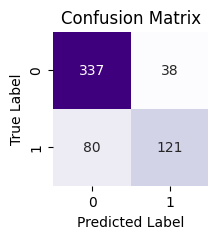


Test Result:
Accuracy Score: 73.44%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.772059   0.642857  0.734375    0.707458      0.726973
recall       0.840000   0.537313  0.734375    0.688657      0.734375
f1-score     0.804598   0.585366  0.734375    0.694982      0.728095
support    125.000000  67.000000  0.734375  192.000000    192.000000
_______________________________________________
Confusion Matrix:
[[105  20]
 [ 31  36]]



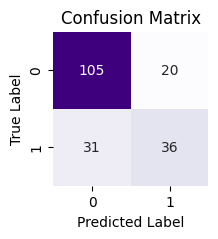

In [160]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluate_model(lr, X_train, y_train, X_test, y_test, True)
print()
evaluate_model(lr, X_train, y_train, X_test, y_test, False)

The F1 score we got using Logistic Regression is very less, and in the Confusion Matrix it is visible that 51 wrong predictions has been made. We need to improve it.

In [161]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

### Decision Tree Classifier

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.00
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix:
[[375   0]
 [  0 201]]



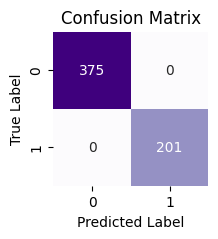


Test Result:
Accuracy Score: 70.83%
_______________________________________________
F1 Score: 0.54
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.751825   0.600000  0.708333    0.675912      0.698844
recall       0.824000   0.492537  0.708333    0.658269      0.708333
f1-score     0.786260   0.540984  0.708333    0.663622      0.700668
support    125.000000  67.000000  0.708333  192.000000    192.000000
_______________________________________________
Confusion Matrix:
[[103  22]
 [ 34  33]]



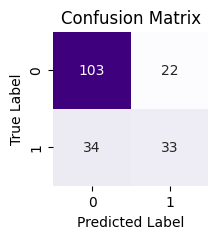

In [162]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluate_model(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluate_model(dtc, X_train, y_train, X_test, y_test, False)

Decision Tree Classifier are prone to Overfitting, and that's what we have got here. We can see that the train accuracy is 100% but the test accuracy is only 71.88%. We also know that Random Forest Classifier helps to overcome this drawback of Decision Tree Classifer. Let's check that model out

In [163]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

### Random Forest Classifier

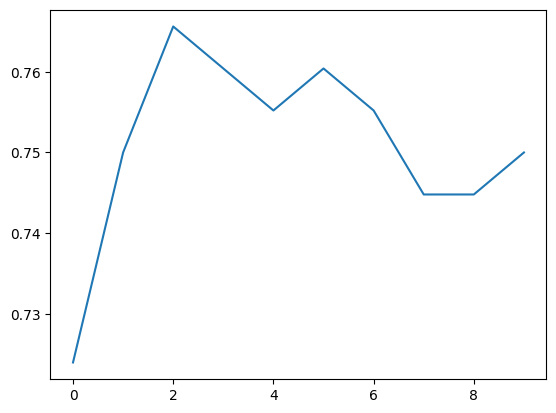

In [164]:
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy_scores)

Maximum test accuracy is achieved using 200 trees.

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.00
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix:
[[375   0]
 [  0 201]]



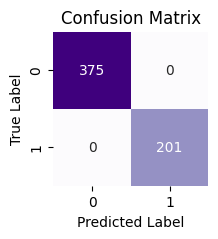


Test Result:
Accuracy Score: 77.60%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.805970   0.706897  0.776042    0.756433      0.771398
recall       0.864000   0.611940  0.776042    0.737970      0.776042
f1-score     0.833977   0.656000  0.776042    0.744988      0.771870
support    125.000000  67.000000  0.776042  192.000000    192.000000
_______________________________________________
Confusion Matrix:
[[108  17]
 [ 26  41]]



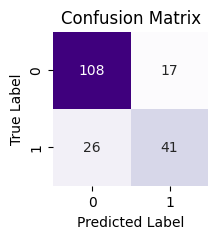

In [165]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

evaluate_model(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluate_model(rfc, X_train, y_train, X_test, y_test, False)

Even here the model has overfitted, but the test accuracy has increased to 73.44%. And 51 wrong predictions are being made. We can also observe that the precision, recall and F1 score is less for the diabetic people. This means that there is a lack of training instances for the outcome '1'. We will be using Cross Validation later in the notebook

In [166]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

### KNN

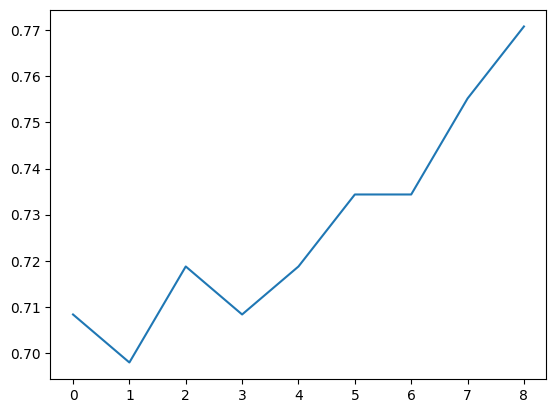

In [167]:
accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.71
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.828010    0.775148    0.8125    0.801579      0.809563
recall       0.898667    0.651741    0.8125    0.775204      0.812500
f1-score     0.861893    0.708108    0.8125    0.785000      0.808228
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix:
[[337  38]
 [ 70 131]]



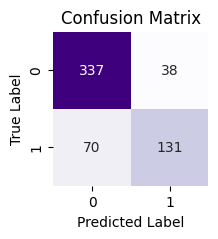

Test Result:
Accuracy Score: 73.44%
_______________________________________________
F1 Score: 0.60
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.780303   0.633333  0.734375    0.706818      0.729017
recall       0.824000   0.567164  0.734375    0.695582      0.734375
f1-score     0.801556   0.598425  0.734375    0.699991      0.730672
support    125.000000  67.000000  0.734375  192.000000    192.000000
_______________________________________________
Confusion Matrix:
[[103  22]
 [ 29  38]]



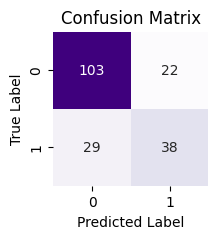

In [168]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

evaluate_model(knn, X_train, y_train, X_test, y_test, True)
evaluate_model(knn, X_train, y_train, X_test, y_test, False)

In [169]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)


### XGBoost

Note: you may need to restart the kernel to use updated packages.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.00
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix:
[[375   0]
 [  0 201]]



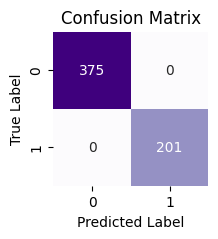

Test Result:
Accuracy Score: 75.52%
_______________________________________________
F1 Score: 0.64
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.804688   0.656250  0.755208    0.730469      0.752889
recall       0.824000   0.626866  0.755208    0.725433      0.755208
f1-score     0.814229   0.641221  0.755208    0.727725      0.753857
support    125.000000  67.000000  0.755208  192.000000    192.000000
_______________________________________________
Confusion Matrix:
[[103  22]
 [ 25  42]]



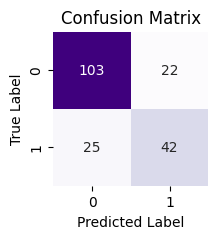

In [170]:
%pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_train, y_train, X_test, y_test, True)
evaluate_model(xgb, X_train, y_train, X_test, y_test, False)

In [171]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_test)) * 100, 2)

### Evaluating All Models

In [172]:
models = {
        'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn, train_score_xgb],
        'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn, test_score_xgb]
        }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
models.head().T

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,K-Nearest Neighbor,XGBoost
Train Accuracy,79.51,100.00,100.0,81.25,100.00
Test Accuracy,73.44,70.83,77.6,73.44,75.52


We see that Decision Tree Classifier, Random Forest Classifier, and XGBoost have all overfitted the given dataset. Let's explore the results when we use Cross Validation.

### Cross Validation

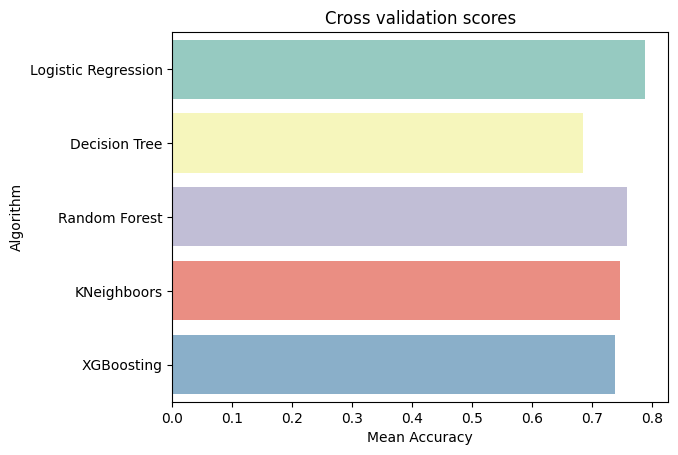

In [173]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
"Random Forest", "KNeighboors", "XGBoosting"]})

g = sns.barplot(
    x="CrossValMeans",
    y="Algorithm",
    data=cv_res,
    palette="Set3",
    orient="h",
)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [174]:
cv_res.head().T

,0,1,2,3,4
CrossValMeans,0.788234,0.686025,0.758832,0.746703,0.738052
CrossValerrors,0.031448,0.058826,0.054799,0.046956,0.04079
Algorithm,Logistic Regression,Decision Tree,Random Forest,KNeighboors,XGBoosting


We can observe that we get the best results for Logistic Regression Algorithm, the accuracy in the case is 78.8%. The Results for Random Forest and KNeighbors Classifier is also not bad. Let's try out Hyperparameter Tuning using GridSearchCv for Random Forest Classifier and XGBoost Classifier

### Hyperparameter Tuning

#### Random Forest Classifier

In [175]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
            "max_features": [1, 3, 10],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


np.float64(0.7743496672716274)

In [176]:
print(RFC_best)

RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=10,
                       min_samples_split=3, n_estimators=300)


#### XGBoost Classifier

In [177]:
XGB = XGBClassifier(verbosity = 0)
gb_param_grid = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1] 
            }

gsXGB = GridSearchCV(XGB, param_grid = gb_param_grid, cv=kfold, scoring="accuracy")

gsXGB.fit(X_train,y_train)

XGB_best = gsXGB.best_estimator_
# Best score
gsXGB.best_score_

np.float64(0.7658499697519662)

In [178]:
print(XGB_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, loss='deviance', max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=0.3,
              max_leaves=None, min_child_weight=None, min_samples_leaf=100,
              missing=nan, monotone_constraints=None, multi_strategy=None, ...)


By fine-tunning Random Forest Classifier & XGBoost Classifier we get the best results. Random Forest Classifier gives the best accuracy of 77.4%. 

## Final Conclusion

This project examined diabetes as a public health challenge under SDG 3: *Good Health and Well-Being*, with the objective of determining whether diabetes risk can be meaningfully inferred from routinely collected health indicators. Exploratory Data Analysis revealed that no single variable clearly distinguishes diabetic from non-diabetic individuals. Instead, diabetes is characterized by gradual, overlapping shifts across multiple physiological and demographic features, with substantial similarity between outcome groups. Correlation analysis further confirmed that while variables such as glucose, BMI, age, and pregnancies are informative, each in isolation provides only partial explanatory power.

These findings revealed a critical structural problem: **risk-related patterns exist within the data before clear diagnostic separation occurs, yet traditional single-variable or threshold-based approaches fail to systematically identify individuals in these intermediate states**. In other words, the challenge is not the absence of relevant health information, but the lack of integrated methods capable of recognizing diabetes risk at earlier stages of progression. This highlights a fundamental limitation in current detection practices and establishes **early identification of diabetes risk** as the core problem addressed in this study.

To evaluate whether these early, multivariate risk patterns could be effectively leveraged, several machine learning models were developed and optimized using GridSearchCV. Among the tested approaches, the **Random Forest Classifier achieved the highest predictive performance (77.4% accuracy)**, followed closely by the **XGBoost Classifier (76.5% accuracy)**. The strong performance of these ensemble-based models demonstrates that diabetes risk is better captured through non-linear, multivariate relationships than through single-feature or rule-based methods.

**Diabetes is not determined by isolated indicators, but emerges from the interaction of multiple health factors**. More importantly, they show that meaningful risk patterns can be detected earlier when multiple variables are considered simultaneously. From a public health perspective, this supports the potential of machine learning–based decision tools to strengthen preventive strategies by **identifying high-risk individuals before severe clinical thresholds and complications are reached**.

In conclusion, this project demonstrates that integrating exploratory data analysis with optimized machine learning models provides a robust framework not only for predicting diabetes, but for addressing the critical problem of **early risk identification**. This approach directly contributes to SDG 3 by offering a scalable, data-driven pathway toward improved preventive care, targeted intervention, and long-term health outcomes.
